In [1]:
import os
import sys
import sklearn
import matplotlib
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
sns.set()
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
df=pd.read_csv('DS_DATA.csv')

In [3]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [5]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(12684, 25)

In [7]:
df.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [8]:
df['Accept(Y/N?)'].value_counts(normalize=False)


1    7210
0    5474
Name: Accept(Y/N?), dtype: int64

In [9]:
df[df.duplicated(keep=False)]

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
23,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,less1,4~8,4~8,less1,1,0,0,0,1,0
89,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,less1,1~3,less1,1~3,1,0,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,...,less1,1~3,less1,1~3,1,0,0,0,1,1
155,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,26,Single,0,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,...,never,less1,less1,less1,1,0,0,0,1,0
10669,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,...,never,1~3,less1,never,1,0,0,0,1,0
10670,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,...,never,1~3,less1,never,1,0,0,0,1,0
10707,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,41,Single,1,...,less1,1~3,1~3,less1,1,0,0,0,1,0


In [10]:
df.duplicated().sum()

291

In [11]:
#Counting duplicated rows
df_counts = df.value_counts().reset_index(name='count')
df_counts

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?),count
0,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,26,Single,0,...,4~8,1~3,never,1,0,0,0,1,0,2
1,No Urgent Place,Friend(s),Snowy,30,Carry out & Take away,1d,Male,21,Single,0,...,1~3,less1,less1,1,1,0,0,1,1,2
2,Home,Alone,Rainy,55,Coffee House,1d,Female,26,Single,0,...,1~3,1~3,1~3,1,0,0,1,0,0,1
3,No Urgent Place,Kid(s),Sunny,55,Coffee House,2h,Male,26,Married partner,1,...,1~3,1~3,less1,1,1,0,0,1,1,1
4,No Urgent Place,Kid(s),Sunny,80,Restaurant(<20),2h,Female,41,Married partner,1,...,1~3,1~3,less1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,No Urgent Place,Friend(s),Snowy,30,Carry out & Take away,1d,Female,26,Single,0,...,1~3,1~3,1~3,1,1,0,0,1,1,1
102,No Urgent Place,Friend(s),Snowy,30,Carry out & Take away,1d,Female,26,Single,0,...,1~3,1~3,1~3,1,1,0,0,1,0,1
103,No Urgent Place,Friend(s),Rainy,55,Bar,2h,Male,21,Single,0,...,1~3,less1,less1,1,1,0,0,1,0,1
104,No Urgent Place,Friend(s),Rainy,55,Bar,2h,Female,26,Single,0,...,1~3,1~3,1~3,1,1,0,0,1,1,1


In [12]:
#As its 2, keeping duplicate values.
df_counts['count'].max()

2

In [13]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [14]:
df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [15]:
#99% of Data is missing
df=df.drop(columns='car',axis=1)

In [16]:
#Seperating cat and num columns to fill null values
cat=df.select_dtypes(include=object)
num=df.select_dtypes(exclude=object)
num=num.drop(columns='Accept(Y/N?)', axis=1)

In [17]:
SI_Num=SimpleImputer(strategy='mean')
SI_Cat=SimpleImputer(strategy='most_frequent')
df1=SI_Num.fit_transform(num)
df2=SI_Cat.fit_transform(cat)

In [18]:
df1=pd.DataFrame(df1,columns=num.columns)
df2=pd.DataFrame(df2,columns=cat.columns)

In [19]:
df_new=pd.concat([df1,df2,df['Accept(Y/N?)']], axis=1)

In [20]:
df_new.isnull().sum()

temperature             0
has_children            0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
destination             0
passanger               0
weather                 0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
Accept(Y/N?)            0
dtype: int64

<Axes: >

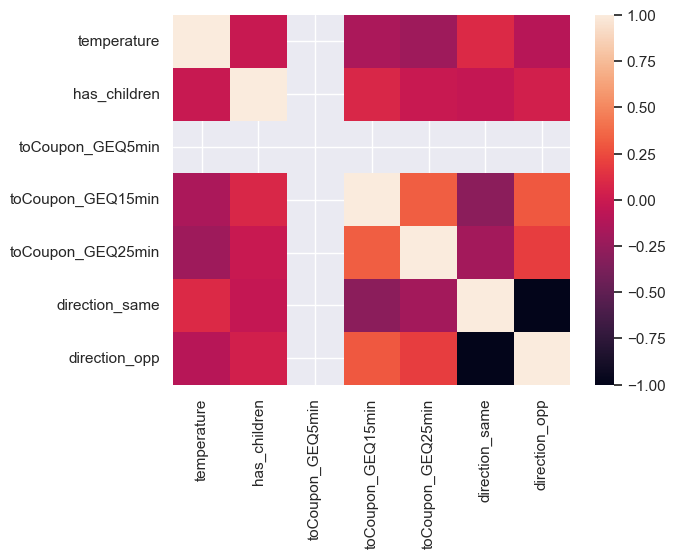

In [21]:
corr = num.corr()
plt.figure()
sns.heatmap(corr)

In [22]:
#Check data points at a granular level
for i in df_new.columns:
    print(i)
    print('')
    print(set(df_new[i]))
    print('')
    print('-------------------------')

temperature

{80.0, 30.0, 55.0}

-------------------------
has_children

{0.0, 1.0}

-------------------------
toCoupon_GEQ5min

{1.0}

-------------------------
toCoupon_GEQ15min

{0.0, 1.0}

-------------------------
toCoupon_GEQ25min

{0.0, 1.0}

-------------------------
direction_same

{0.0, 1.0}

-------------------------
direction_opp

{0.0, 1.0}

-------------------------
destination

{'Work', 'Home', 'No Urgent Place'}

-------------------------
passanger

{'Kid(s)', 'Partner', 'Alone', 'Friend(s)'}

-------------------------
weather

{'Rainy', 'Sunny', 'Snowy'}

-------------------------
coupon

{'Carry out & Take away', 'Bar', 'Restaurant(20-50)', 'Coffee House', 'Restaurant(<20)'}

-------------------------
expiration

{'2h', '1d'}

-------------------------
gender

{'Male', 'Female'}

-------------------------
age

{'21', '36', '41', '31', '26', 'below21', '50plus', '46'}

-------------------------
maritalStatus

{'Single', 'Unmarried partner', 'Married partner', 'Widowed'

In [23]:
df_new2=df_new

In [24]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           12684 non-null  float64
 1   has_children          12684 non-null  float64
 2   toCoupon_GEQ5min      12684 non-null  float64
 3   toCoupon_GEQ15min     12684 non-null  float64
 4   toCoupon_GEQ25min     12684 non-null  float64
 5   direction_same        12684 non-null  float64
 6   direction_opp         12684 non-null  float64
 7   destination           12684 non-null  object 
 8   passanger             12684 non-null  object 
 9   weather               12684 non-null  object 
 10  coupon                12684 non-null  object 
 11  expiration            12684 non-null  object 
 12  gender                12684 non-null  object 
 13  age                   12684 non-null  object 
 14  maritalStatus         12684 non-null  object 
 15  education          

In [25]:
df_new.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination,passanger,weather,...,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Accept(Y/N?)
0,55.0,1.0,1.0,0.0,0.0,0.0,1.0,No Urgent Place,Alone,Sunny,...,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1
1,80.0,1.0,1.0,0.0,0.0,0.0,1.0,No Urgent Place,Friend(s),Sunny,...,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0
2,80.0,1.0,1.0,1.0,0.0,0.0,1.0,No Urgent Place,Friend(s),Sunny,...,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1
3,80.0,1.0,1.0,1.0,0.0,0.0,1.0,No Urgent Place,Friend(s),Sunny,...,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0
4,80.0,1.0,1.0,1.0,0.0,0.0,1.0,No Urgent Place,Friend(s),Sunny,...,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0


In [26]:
nominal=['destination','passanger', 'weather', 'coupon','gender','maritalStatus','education','occupation']
df_new2=pd.get_dummies(df_new,columns=nominal,drop_first= True, dtype=int)


In [27]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   temperature                                           12684 non-null  float64
 1   has_children                                          12684 non-null  float64
 2   toCoupon_GEQ5min                                      12684 non-null  float64
 3   toCoupon_GEQ15min                                     12684 non-null  float64
 4   toCoupon_GEQ25min                                     12684 non-null  float64
 5   direction_same                                        12684 non-null  float64
 6   direction_opp                                         12684 non-null  float64
 7   expiration                                            12684 non-null  object 
 8   age                                                   12

In [28]:
df_new2['expiration']=df_new2['expiration'].replace(['2h', '1d'],[2,24])
df_new2['age']=df_new2['age'].replace(['36', '50plus', '31', 'below21', '21', '46', '26', '41'],[4,7,3,0,1,6,2,5])
df_new2['Bar']=df_new2['Bar'].replace(['never', 'gt8', '1~3', '4~8', 'less1'],[0,4,2,3,1])
df_new2['CoffeeHouse']=df_new2['CoffeeHouse'].replace(['never', 'gt8', '1~3', '4~8', 'less1'],[0,4,2,3,1])
df_new2['CarryAway']=df_new2['CarryAway'].replace(['never', 'gt8', '1~3', '4~8', 'less1'],[0,4,2,3,1])
df_new2['RestaurantLessThan20']=df_new2['RestaurantLessThan20'].replace(['never', 'gt8', '1~3', '4~8', 'less1'],[0,4,2,3,1])
df_new2['Restaurant20To50']=df_new2['Restaurant20To50'].replace(['never', 'gt8', '1~3', '4~8', 'less1'],[0,4,2,3,1])



In [29]:
for i in df_new2.columns:
    print(i)
    print('')
    print(set(df_new2[i]))
    print('')
    print('-------------------------')

temperature

{80.0, 30.0, 55.0}

-------------------------
has_children

{0.0, 1.0}

-------------------------
toCoupon_GEQ5min

{1.0}

-------------------------
toCoupon_GEQ15min

{0.0, 1.0}

-------------------------
toCoupon_GEQ25min

{0.0, 1.0}

-------------------------
direction_same

{0.0, 1.0}

-------------------------
direction_opp

{0.0, 1.0}

-------------------------
expiration

{24, 2}

-------------------------
age

{0, 1, 2, 3, 4, 5, 6, 7}

-------------------------
income

{'Less than $12500', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$87500 - $99999', '$37500 - $49999', '$25000 - $37499', '$62500 - $74999', '$100000 or More'}

-------------------------
Bar

{0, 1, 2, 3, 4}

-------------------------
CoffeeHouse

{0, 1, 2, 3, 4}

-------------------------
CarryAway

{0, 1, 2, 3, 4}

-------------------------
RestaurantLessThan20

{0, 1, 2, 3, 4}

-------------------------
Restaurant20To50

{0, 1, 2, 3, 4}

-------------------------
Accept(Y/N?)

{0, 1}


In [30]:
income_map = {
    'Less than $12500': 6250,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 112500
}

df_new2['income'] = df_new2['income'].replace(income_map)

In [31]:
for i in df_new2.columns:
    print(i)
    print('')
    print(set(df_new2[i]))
    print('')
    print('-------------------------')

temperature

{80.0, 30.0, 55.0}

-------------------------
has_children

{0.0, 1.0}

-------------------------
toCoupon_GEQ5min

{1.0}

-------------------------
toCoupon_GEQ15min

{0.0, 1.0}

-------------------------
toCoupon_GEQ25min

{0.0, 1.0}

-------------------------
direction_same

{0.0, 1.0}

-------------------------
direction_opp

{0.0, 1.0}

-------------------------
expiration

{24, 2}

-------------------------
age

{0, 1, 2, 3, 4, 5, 6, 7}

-------------------------
income

{81250, 43750, 6250, 68750, 31250, 112500, 93750, 56250, 18750}

-------------------------
Bar

{0, 1, 2, 3, 4}

-------------------------
CoffeeHouse

{0, 1, 2, 3, 4}

-------------------------
CarryAway

{0, 1, 2, 3, 4}

-------------------------
RestaurantLessThan20

{0, 1, 2, 3, 4}

-------------------------
Restaurant20To50

{0, 1, 2, 3, 4}

-------------------------
Accept(Y/N?)

{0, 1}

-------------------------
destination_No Urgent Place

{0, 1}

-------------------------
destination_Work

{

In [32]:
df_new2['toCoupon_GEQ5min'].unique()

array([1.])

In [33]:
#Dropping as it is constant
df_new2=df_new2.drop(columns=['toCoupon_GEQ5min'],axis=1)

In [34]:
x=df_new2.drop(columns='Accept(Y/N?)',axis=1)
y=df_new2['Accept(Y/N?)']

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22,stratify=y)

In [37]:
x_train.columns = x_train.columns.str.replace('[\[\]<>() ]', '_', regex=True)
x_test.columns = x_test.columns.str.replace('[\[\]<>() ]', '_', regex=True)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=10, scoring='accuracy')

       Method Used  Accuracy
0  LogitRegression  0.653528
1            Dtree  0.700039
2          RForest  0.769019
3              KNN  0.651951
4              SVM  0.568388
5              NBT  0.635790
6           Voting  0.738274
7          XGBoost  0.780055


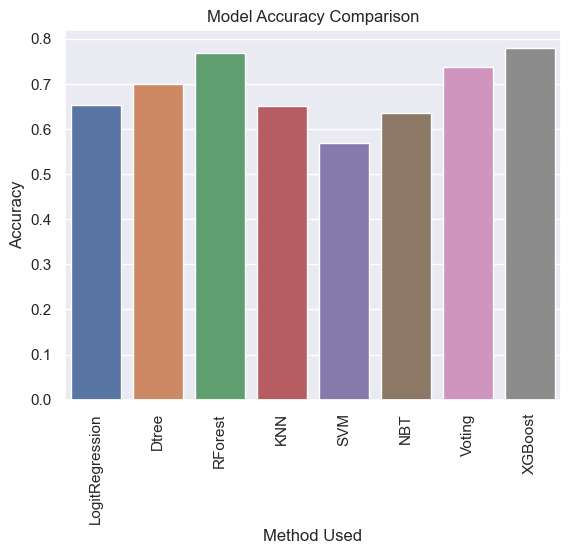

In [40]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth= 9, n_estimators=300, reg_lambda=10, subsample=0.8)
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegression','Dtree','RForest','KNN','SVM','NBT','Voting','XGBoost']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc,accuracy_xg]
list3 = [logit,dtree,rforest,knn,svm,nbt,model_evc,xgboost]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Model Accuracy Comparison")
plt.show()
                    

       Method Used  Accuracy
7          XGBoost  0.780055
2          RForest  0.769019
6           Voting  0.738274
1            Dtree  0.700039
0  LogitRegression  0.653528
3              KNN  0.651951
5              NBT  0.635790
4              SVM  0.568388


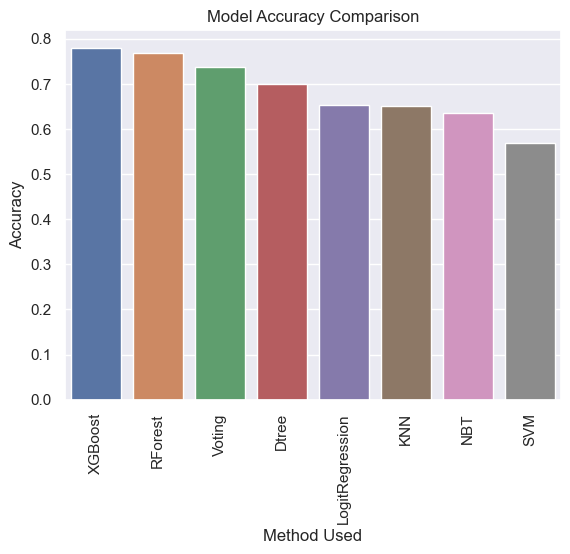

In [41]:
df_accuracy = df_accuracy.sort_values(by="Accuracy", ascending=False)
print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Model Accuracy Comparison")
plt.show()

In [42]:
best_index = df_accuracy["Accuracy"].idxmax()
print("Best Model:", df_accuracy.loc[best_index, "Method Used"])
print("Accuracy:", df_accuracy.loc[best_index, "Accuracy"])


Best Model: XGBoost
Accuracy: 0.7800551832873472


In [43]:
#Checking Class Imbalance
print(df_new2['Accept(Y/N?)'].value_counts(normalize=True))

1    0.568433
0    0.431567
Name: Accept(Y/N?), dtype: float64


In [44]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'reg_lambda': [1, 5, 10]
}

grid = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1  # use all cores for speed
)

grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'reg_lambda': 10, 'subsample': 0.8}
Best cross-val accuracy: 0.7588469653084463


In [45]:
y_pred_xg = grid.best_estimator_.predict(x_test)


In [46]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1095
           1       0.80      0.83      0.81      1442

    accuracy                           0.78      2537
   macro avg       0.78      0.77      0.78      2537
weighted avg       0.78      0.78      0.78      2537



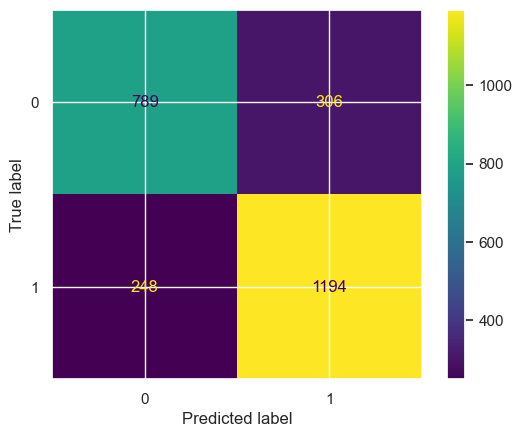

In [47]:
matrix=confusion_matrix(y_test,y_pred_xg)
disp=ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.73891626 0.74581281 0.73300493 0.73990148 0.7773399  0.73990148
 0.75369458 0.74556213 0.77317554 0.75838264]
Mean accuracy: 0.7505691744153282


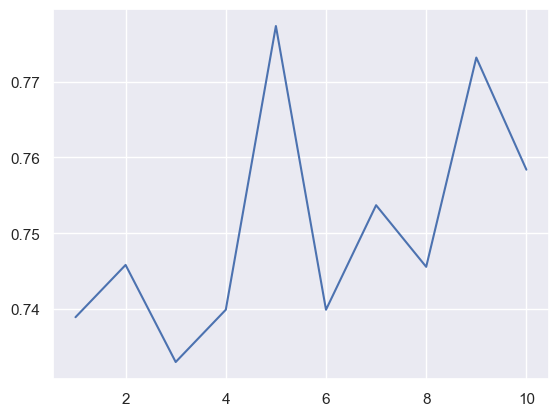

In [49]:
plt.plot(range(1,11),cv_scores)